In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


train_data = pd.read_csv(r'C:\Users\avina\OneDrive\Desktop\git hub\digit_reconizer\test.csv')
test_data = pd.read_csv(r'C:\Users\avina\OneDrive\Desktop\git hub\digit_reconizer\train.csv')


In [4]:
train_data['label'] = 0
test_data['label'] = 1

In [5]:
train_data.shape,test_data.shape

((28000, 785), (42000, 785))

In [6]:
merge = pd.concat([train_data,test_data],axis=0)

In [7]:
merge

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
X = merge.drop(columns=['label'])
Y = merge['label']

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.2,random_state=42)

In [10]:
# Model training
LG = LogisticRegression()
LG.fit(X_train, Y_train)



C:\Users\avina\anaconda3\envs\NLP\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
xpre = LG.predict(X_test)
LG.score(X_test,Y_test)

0.5661428571428572

In [12]:
print(classification_report(xpre,Y_test))

              precision    recall  f1-score   support

           0       0.17      0.40      0.24      9589
           1       0.83      0.60      0.70     46411

    accuracy                           0.57     56000
   macro avg       0.50      0.50      0.47     56000
weighted avg       0.72      0.57      0.62     56000



In [13]:
from sklearn.tree import DecisionTreeClassifier

DC = DecisionTreeClassifier()
DC.fit(X_train,Y_train)


DecisionTreeClassifier()

In [14]:
xpre = DC.predict(X_test)
DC.score(X_test,Y_test)

0.5154464285714285

In [15]:
print(classification_report(xpre,Y_test))

              precision    recall  f1-score   support

           0       0.42      0.40      0.41     23474
           1       0.58      0.60      0.59     32526

    accuracy                           0.52     56000
   macro avg       0.50      0.50      0.50     56000
weighted avg       0.51      0.52      0.51     56000



In [16]:
pip install tensorflow

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Flatten

model = Sequential([
    Flatten(input_shape=(X_train.shape[1],)),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

C:\Users\avina\anaconda3\envs\NLP\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(X_train,Y_train,epochs=10,validation_split=0.1,batch_size=32)

Epoch 1/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4972 - loss: 12.2760 - val_accuracy: 0.4814 - val_loss: 0.9051
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5472 - loss: 0.9767 - val_accuracy: 0.5221 - val_loss: 0.7951
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5500 - loss: 0.7832 - val_accuracy: 0.4357 - val_loss: 0.9339
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5645 - loss: 0.7314 - val_accuracy: 0.5536 - val_loss: 0.7604
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5777 - loss: 0.7141 - val_accuracy: 0.4314 - val_loss: 0.9114
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5817 - loss: 0.7250 - val_accuracy: 0.5607 - val_loss: 0.8003
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5759 - loss: 0.7337 - val_accuracy: 0.5500 - val_loss: 0.8000
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5930 - loss: 0.6871 - val_accuracy: 0

In [20]:
xpre = model.predict(X_test)


1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [21]:
import numpy as np

y_pred_class = np.argmax(xpre, axis=1)

In [22]:
accuracy_score(y_pred_class,Y_test)

0.5979642857142857

In [23]:
print(classification_report(y_pred_class,Y_test))

              precision    recall  f1-score   support

           0       0.02      0.40      0.04      1031
           1       0.98      0.60      0.75     54956
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         2

    accuracy                           0.60     56000
   macro avg       0.17      0.17      0.13     56000
weighted avg       0.96      0.60      0.73     56000



C:\Users\avina\anaconda3\envs\NLP\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\avina\anaconda3\envs\NLP\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\avina\anaconda3\envs\NLP\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [36]:
import matplotlib.pyplot as plt

# Function to plot images with predictions
def plot_sample_images(X, Y_test, xpre, num_samples=10):
    plt.figure(figsize=(12, 6))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        # Reshape flattened image back to 28x28 (for example)
        plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
        plt.title(f"True: {Y_test.iloc[i]}\nPred: {xpre[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

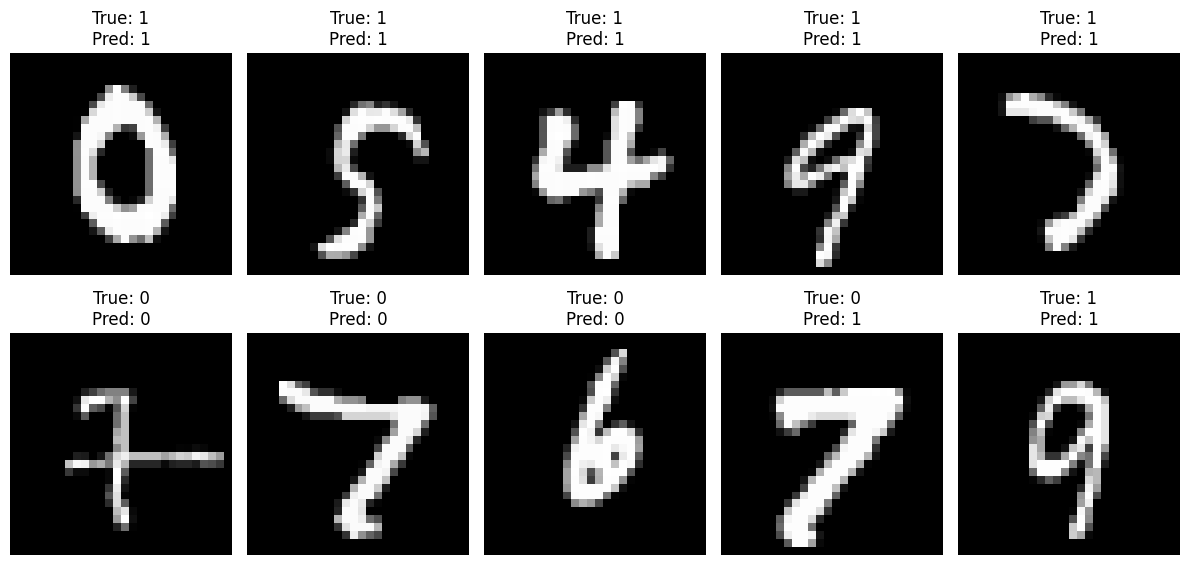

In [37]:
lg_predictions = LG.predict(X_test)  # Get predictions
plot_sample_images(X_test, Y_test.reset_index(drop=True), lg_predictions)


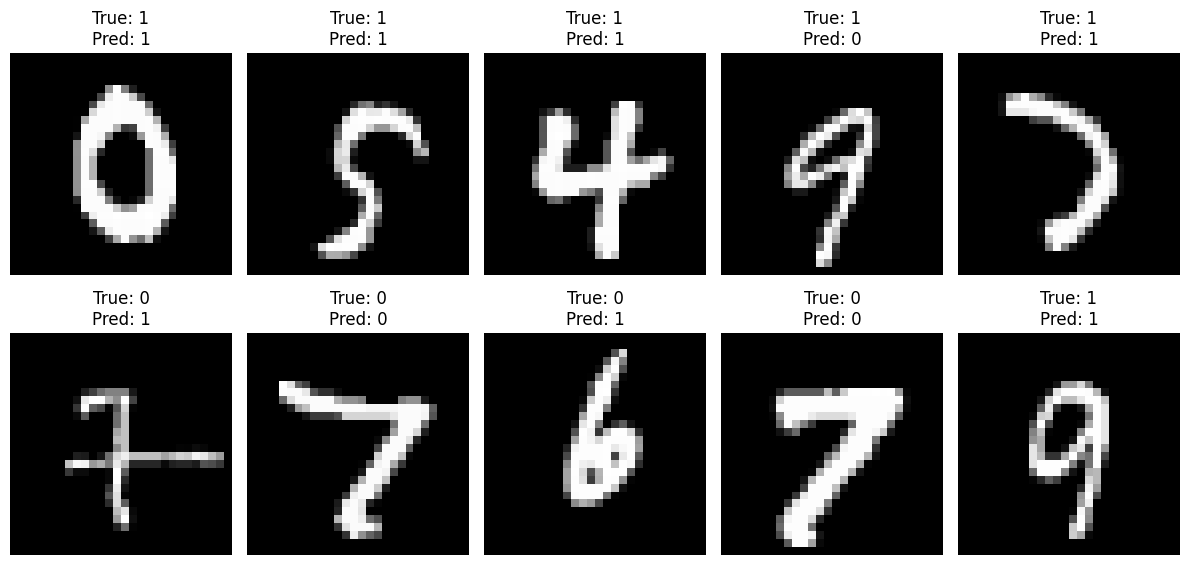

In [26]:
dc_predictions = DC.predict(X_test)  # Get predictions
plot_sample_images(X_test, Y_test.reset_index(drop=True), dc_predictions)


1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


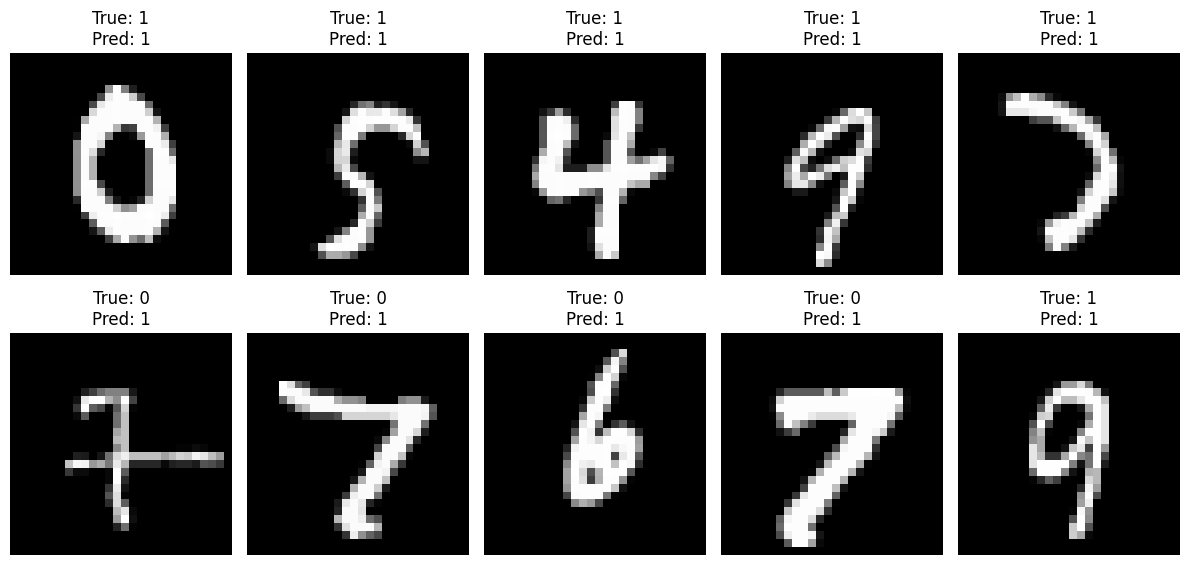

In [27]:
tf_predictions_prob = model.predict(X_test)  # Probabilities
tf_predictions = np.argmax(tf_predictions_prob, axis=1)  # Convert probabilities to class labels
plot_sample_images(X_test, Y_test.reset_index(drop=True), tf_predictions)
